In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score

In [87]:
def find_limits(df, feature):
    iqr = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    
    lower_limit = df[feature].quantile(0.25) - (iqr * 1.5)
    upper_limit = df[feature].quantile(0.75) + (iqr * 1.5)
    return lower_limit, upper_limit

In [88]:
def finding_best_params(model, grid_params, X_train, y_train, cv=5 ):
    grid_search = GridSearchCV(model, grid_params, cv=cv)    
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_

In [95]:
def eval_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    model_pred = model.predict(X_test)
    return model, {"train_acc": r2_score(y_train, model.predict(X_train)),
            "test_acc": r2_score(y_test, model_pred)}

In [74]:
data = pd.read_csv("data/Diamonds Prices2022.csv")
print(data.shape)
data.head()

(53943, 11)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [75]:
data = data[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'price']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   x        53943 non-null  float64
 7   y        53943 non-null  float64
 8   z        53943 non-null  float64
 9   price    53943 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [76]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [77]:
num_features = list(data.select_dtypes(['float64', 'int64']))
cat_features = list(data.select_dtypes('object'))
num_features, cat_features

(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'],
 ['cut', 'color', 'clarity'])

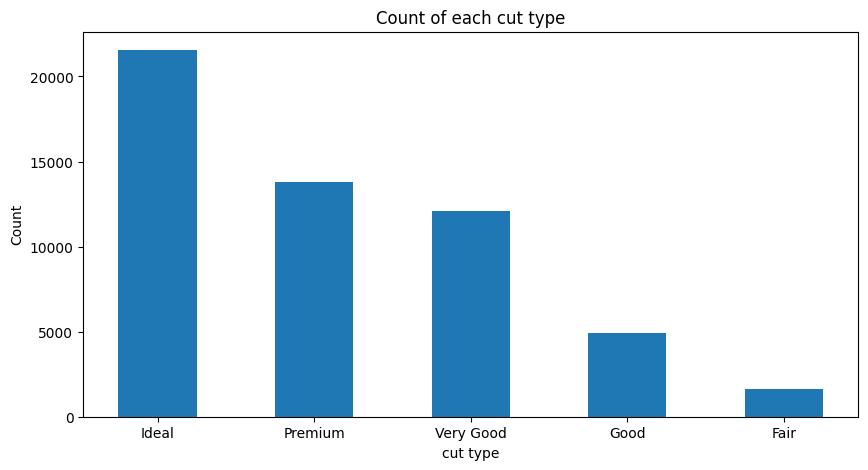

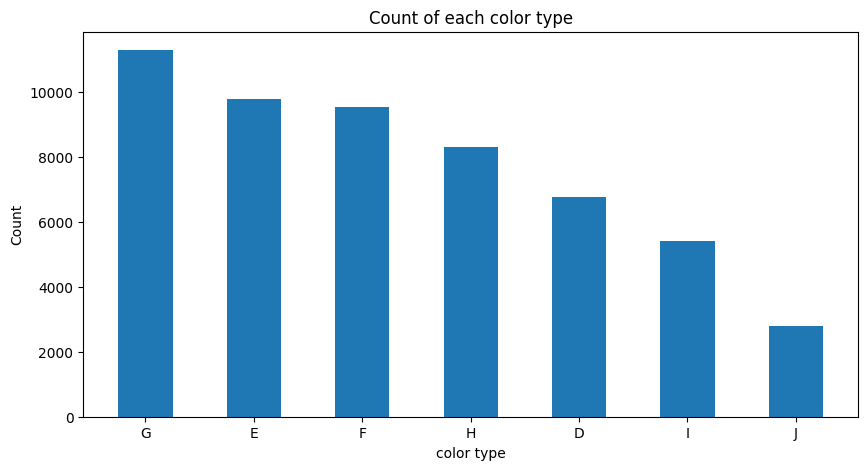

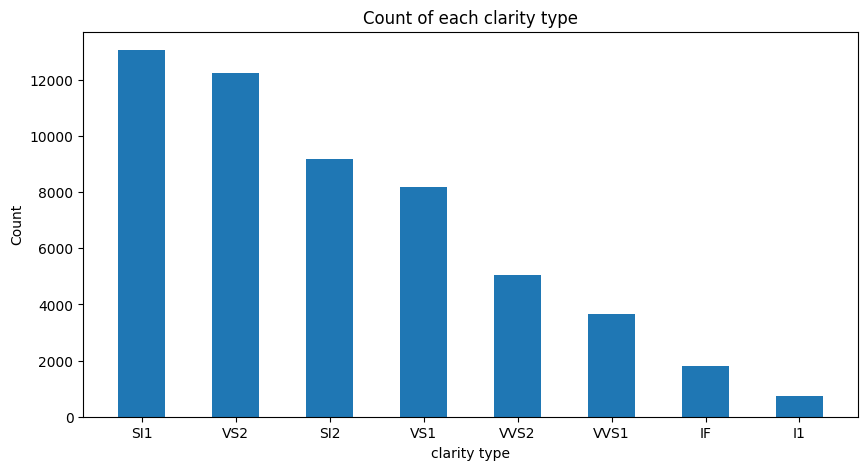

In [78]:
for feature in cat_features:
    tp_dict = dict(data[feature].value_counts())
    plt.figure(figsize=(10, 5))
    plt.bar(list(tp_dict.keys()), list(tp_dict.values()), width = 0.5)
    plt.title(f'Count of each {feature} type')
    plt.xlabel(f'{feature} type')
    plt.ylabel('Count')
    plt.show()

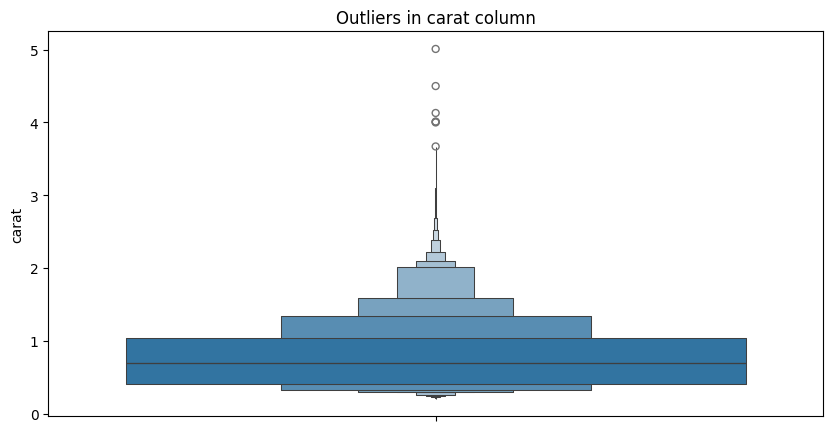

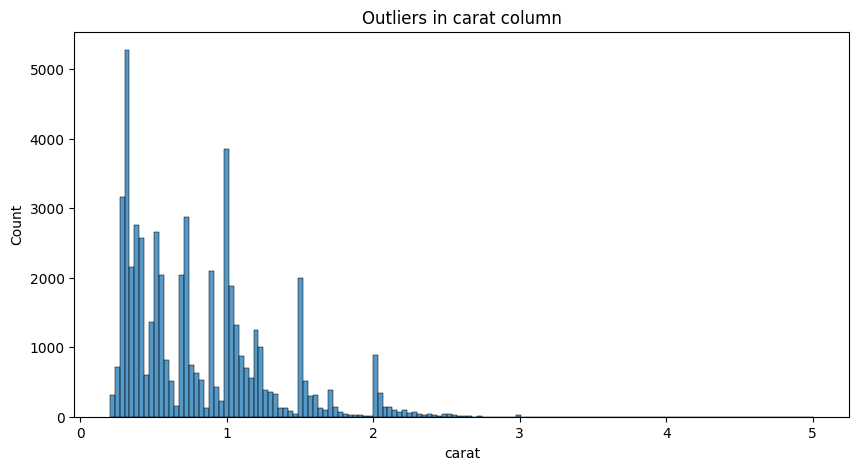

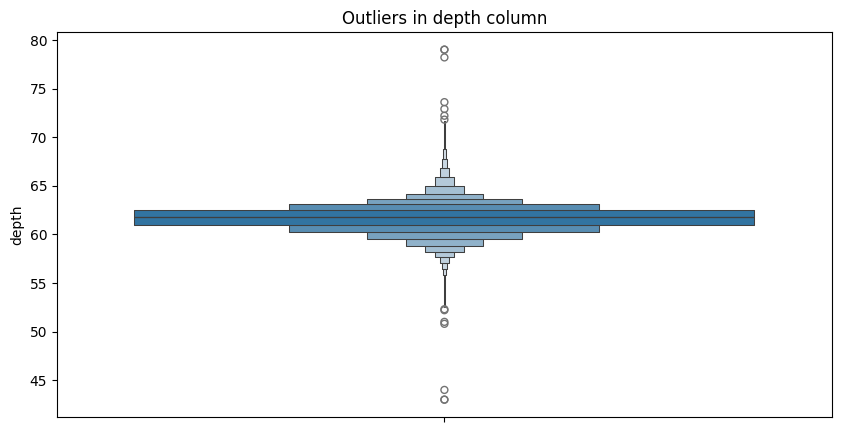

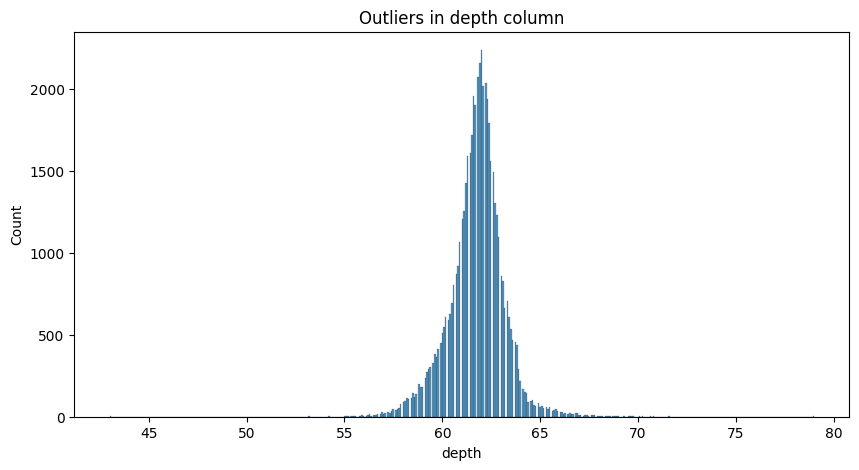

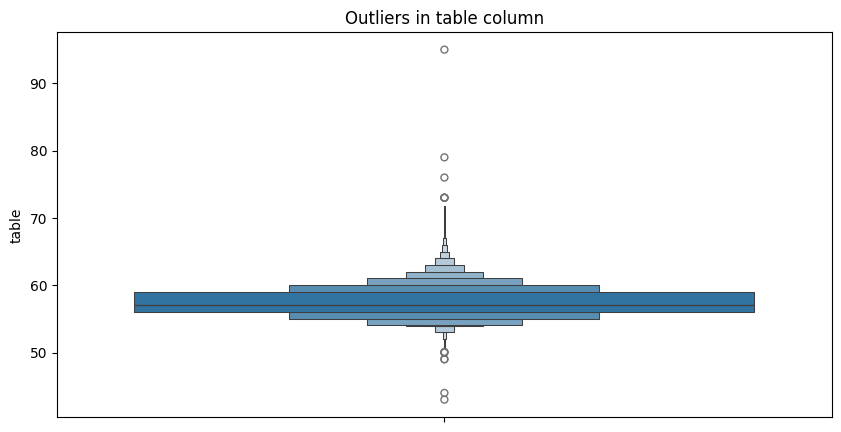

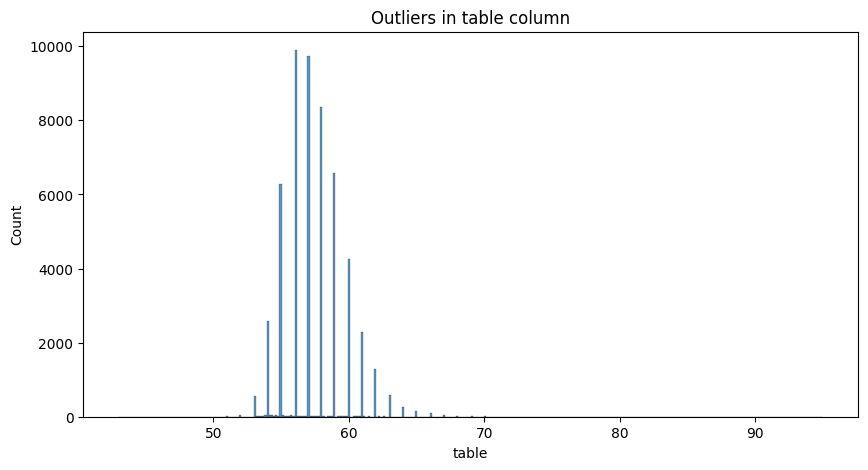

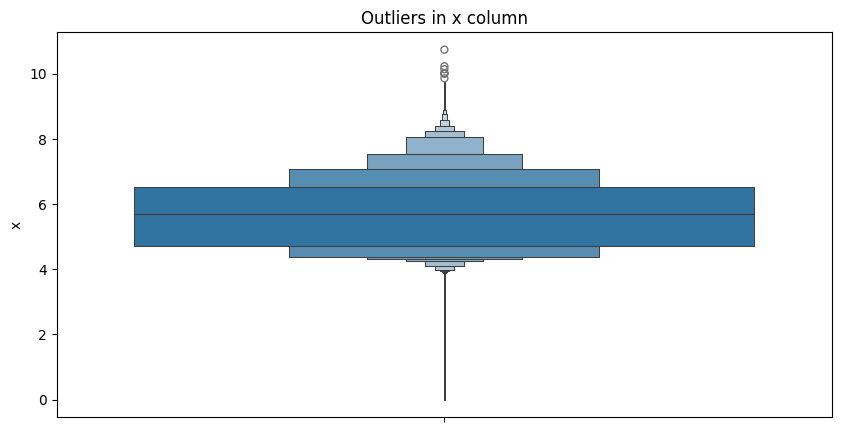

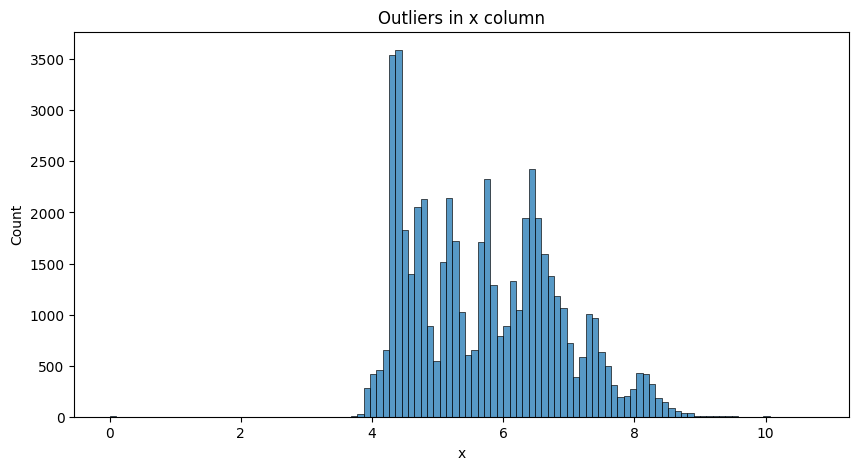

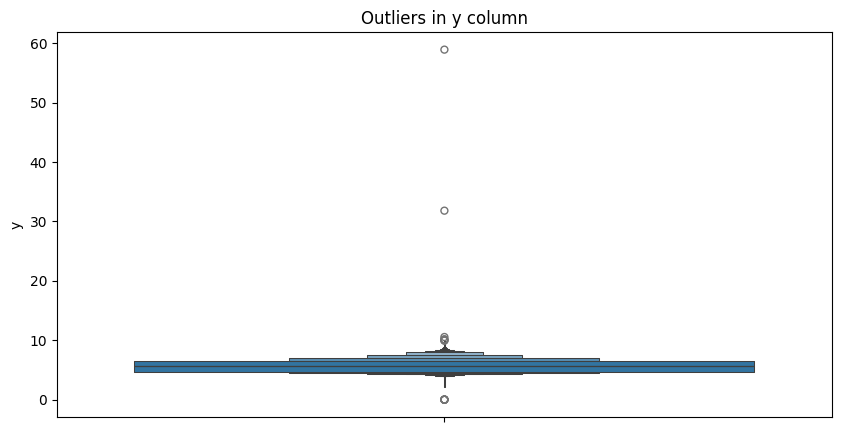

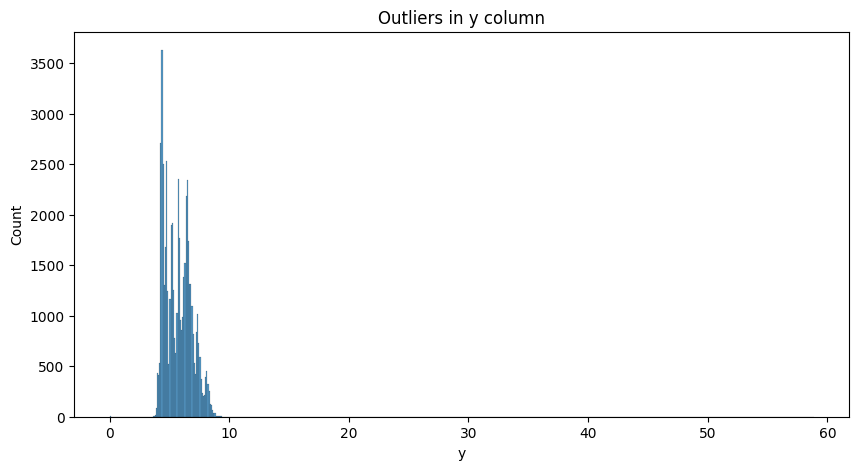

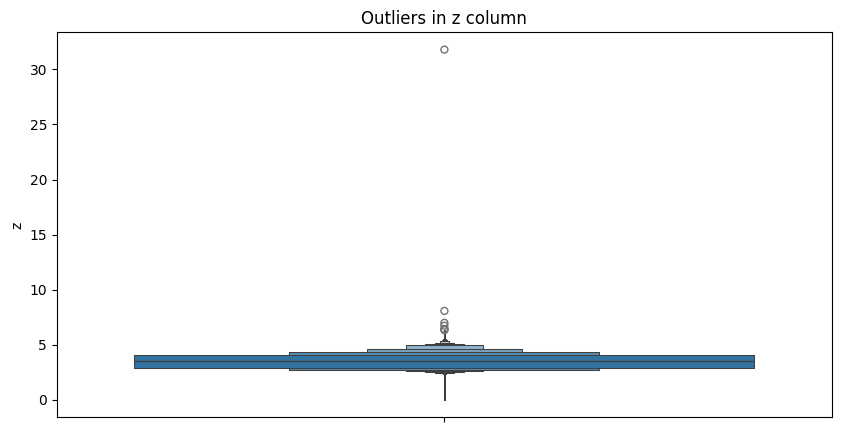

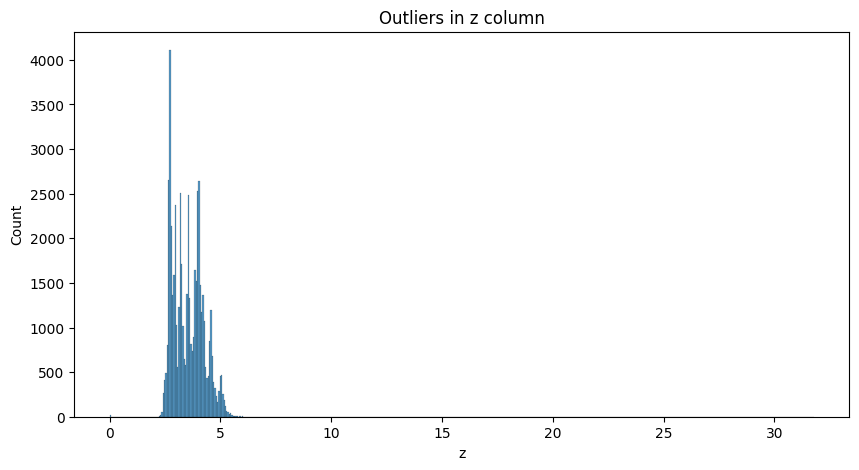

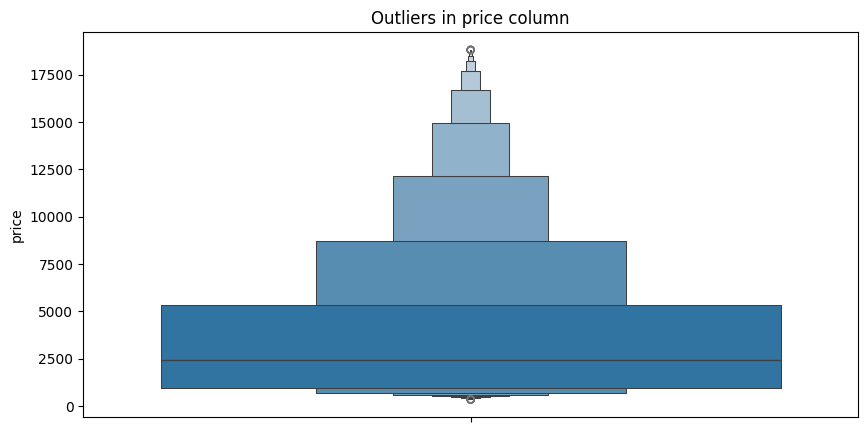

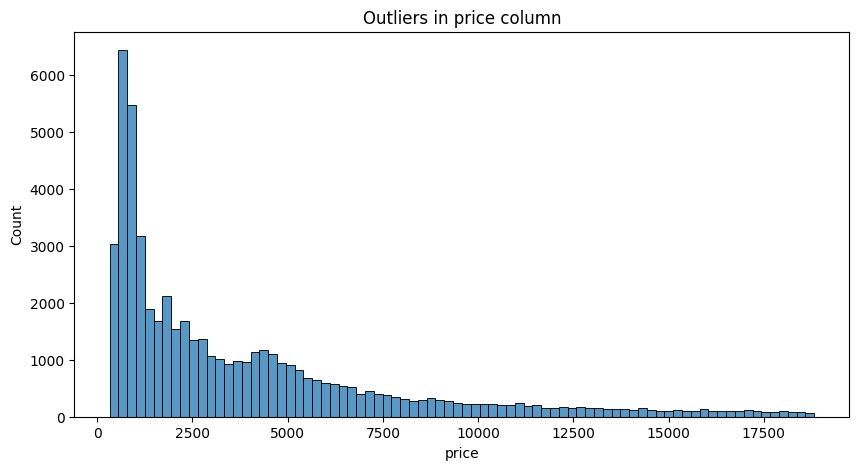

In [79]:
for feature in num_features:
    plt.figure(figsize=(10,5))
    sns.boxenplot(y=feature, data=data)
    plt.title(f"Outliers in {feature} column")
    plt.show()

    plt.figure(figsize=(10,5))
    sns.histplot(x=feature, data=data)
    plt.title(f"Outliers in {feature} column")
    plt.show()

In [81]:
for feature in num_features:
    lower_limit, upper_limit = find_limits(data, feature) 
    
    x =  data[feature].ge(lower_limit)
    data = data.loc[x]
    y = data[feature].le(upper_limit)
    data = data.loc[y]

In [82]:
data = pd.get_dummies(data, columns=cat_features)
data = data.reset_index(drop=True)

In [83]:
data

,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,326,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,326,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0.29,62.4,58.0,4.20,4.23,2.63,334,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0.31,63.3,58.0,4.34,4.35,2.75,335,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0.24,62.8,57.0,3.94,3.96,2.48,336,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46528,0.86,61.0,58.0,6.15,6.12,3.74,2757,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
46529,0.75,62.2,55.0,5.83,5.87,3.64,2757,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
46530,0.71,60.5,55.0,5.79,5.74,3.49,2756,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
46531,0.71,59.8,62.0,5.74,5.73,3.43,2756,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [84]:
X = data.drop('price', axis=1)
y = data['price']

X_train, X_test, y_train, y_test =  train_test_split(X, y, random_state=42, train_size=0.8, shuffle=True)

In [85]:
X_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [86]:
X_train.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
39084,0.59,62.6,56.0,5.39,5.34,3.36,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
13353,1.24,60.1,59.0,7.02,6.95,4.20,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
6375,0.33,59.3,61.0,4.49,4.51,2.67,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
40465,0.23,61.8,59.0,3.90,3.93,2.42,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
21887,0.30,62.0,60.0,4.23,4.26,2.63,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [89]:
gb_r = GradientBoostingRegressor()
rf_r = RandomForestRegressor()

In [90]:
rf_r_parameters = {
    'n_estimators': [100, 150, 200],
    'max_depth': [1,2,3],
    'min_samples_leaf': [1, 2, 3]
}

In [91]:
print(finding_best_params(rf_r, rf_r_parameters, X_train_nromalized, y_train, cv=5))

{'max_depth': 3, 'min_samples_leaf': 3, 'n_estimators': 200}


In [92]:
gb_r_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'subsample': [1.0],
    'max_depth': [3, 7]
}

In [93]:
print(finding_best_params(gb_r, gb_r_params, X_train, y_train, cv=5))

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}


In [94]:
gb_r = GradientBoostingRegressor(learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0)
rf_r = RandomForestRegressor(max_depth=3, min_samples_leaf=1, n_estimators=100)

In [96]:
rf_r_result = eval_model(rf_r, X_train, X_test, y_train, y_test)
gb_r_result = eval_model(gb_r, X_train, X_test, y_train, y_test)

In [97]:
print(rf_r_result[1])
print(gb_r_result[1])

{'train_acc': 0.8808066635867157, 'test_acc': 0.8826262374369687}
{'train_acc': 0.9910791023308836, 'test_acc': 0.983566932125883}


C:\Users\lilto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


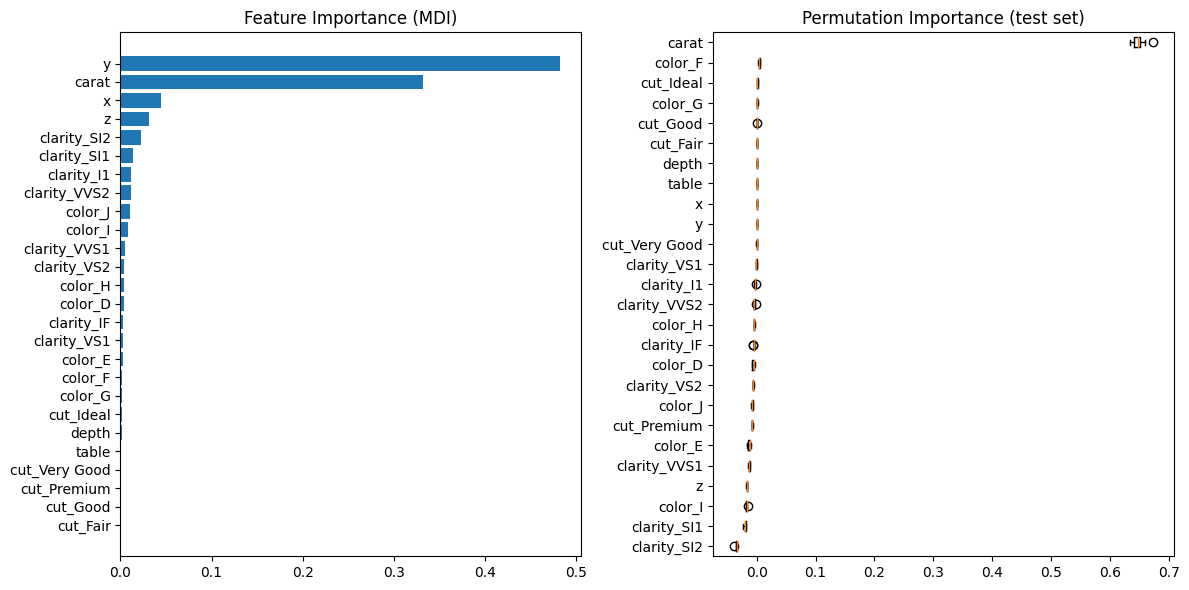

In [108]:
#### PLot feature importance for gradient boost regressor

feature_names = X_train.columns

feature_importance = gb_r_result[0].feature_importances_
sorted_idx = np.argsort(feature_importance)

pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(feature_names)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    gb_r_result[0], X_test_normalized, y_test, n_repeats=10, random_state=42, n_jobs=2
)

sorted_idx = result.importances_mean.argsort()

plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(feature_names)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [123]:
data = pd.read_csv("data/Diamonds Prices2022.csv")
print(data.shape)
data.head()

(53943, 11)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [124]:
data = data[['carat', 'color', 'clarity', 'x', 'y', 'z', 'price']]

In [125]:
num_features = list(data.select_dtypes(['float64', 'int64']))
cat_features = list(data.select_dtypes('object'))
num_features, cat_features

(['carat', 'x', 'y', 'z', 'price'], ['color', 'clarity'])

In [126]:
for feature in num_features:
    lower_limit, upper_limit = find_limits(data, feature) 
    
    x =  data[feature].ge(lower_limit)
    data = data.loc[x]
    y = data[feature].le(upper_limit)
    data = data.loc[y]

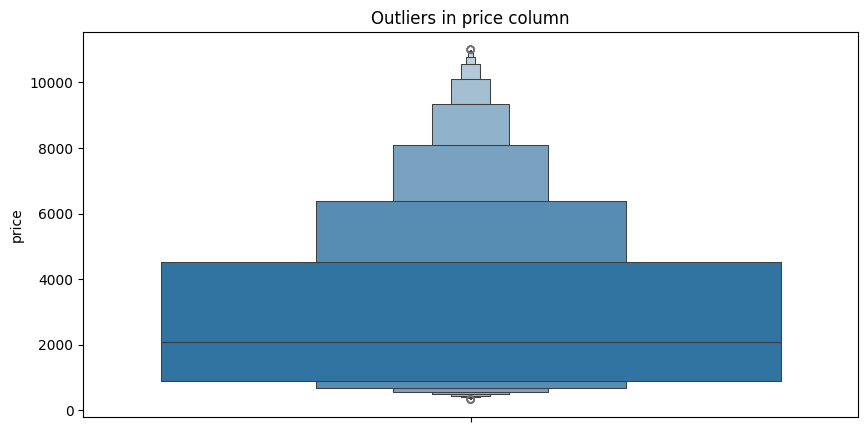

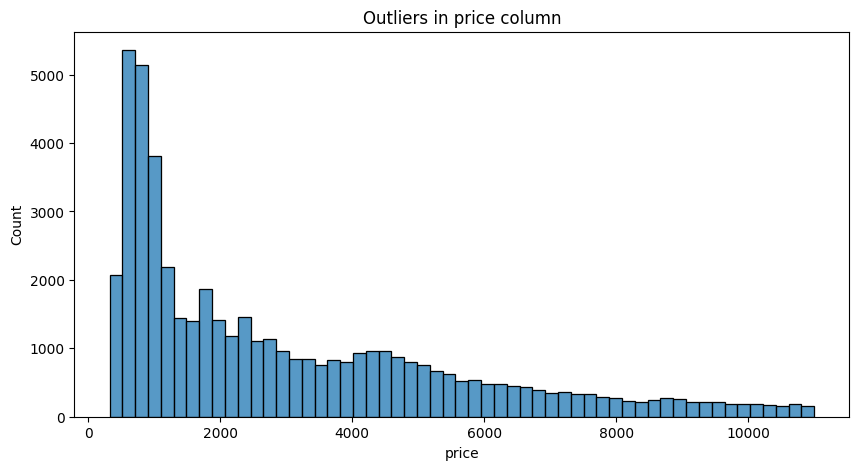

In [127]:
plt.figure(figsize=(10,5))
sns.boxenplot(y="price", data=data)
plt.title(f"Outliers in price column")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(x="price", data=data)
plt.title(f"Outliers in price column")
plt.show()

In [128]:
data = data[(data['price'] <= 6000)]
data

,carat,color,clarity,x,y,z,price
0,0.23,E,SI2,3.95,3.98,2.43,326
1,0.21,E,SI1,3.89,3.84,2.31,326
2,0.23,E,VS1,4.05,4.07,2.31,327
3,0.29,I,VS2,4.20,4.23,2.63,334
4,0.31,J,SI2,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...
53938,0.86,H,SI2,6.15,6.12,3.74,2757
53939,0.75,D,SI2,5.83,5.87,3.64,2757
53940,0.71,E,SI1,5.79,5.74,3.49,2756
53941,0.71,F,SI1,5.74,5.73,3.43,2756


In [129]:
data = pd.get_dummies(data, columns=cat_features)

In [130]:
X = data.drop('price', axis=1)
y = data['price']

X_train, X_test, y_train, y_test =  train_test_split(X, y, random_state=42, train_size=0.8, shuffle=True)

In [131]:
gb_r_2 = GradientBoostingRegressor()

In [132]:
gb_r_params_2 = {
    'n_estimators': [50, 100, 200, 400],
    'learning_rate': [0.01, 0.1, 1.0],
    'subsample': [1.0, 0.5, 0.7],
    'max_depth': [3, 7]
}

In [133]:
print(finding_best_params(gb_r_2, gb_r_params_2, X_train, y_train, cv=5))

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.7}


In [134]:
gb_r_2 = GradientBoostingRegressor(learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.7)

In [135]:
gb_r_2_result = eval_model(gb_r_2, X_train, X_test, y_train, y_test)

In [136]:
print(gb_r_2_result[1])

{'train_acc': 0.9879188630645748, 'test_acc': 0.978301511042677}


In [137]:
filename = 'finalized_model.sav'
pickle.dump(gb_r_2_result[0], open(filename, 'wb'))